In [41]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

# Q1

## Read 1.jpg image

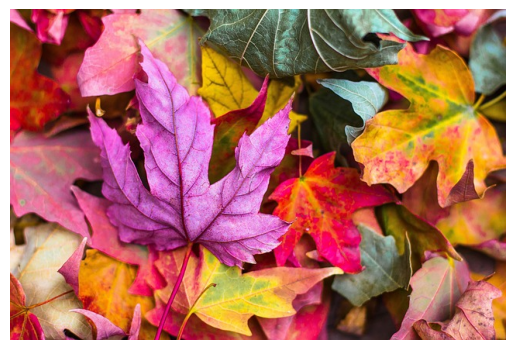

In [42]:
q1_image1 = cv.cvtColor(cv.imread(os.path.join('images/', '1.jpg')),cv.COLOR_BGR2RGB)
plt.imshow(q1_image1)
plt.axis("off") 
plt.show()

## Q1.1: RGB to CMYK & CMYK to RGB

In [43]:
def RGB_to_CMYK(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #############

    # Normalize RGB values
  r = r / RGB_SCALE
  g = g / RGB_SCALE
  b = b / RGB_SCALE
  
  # Find the maximum value among R, G, and B
  max_color = np.maximum(r, np.maximum(g, b))

  # Calculate K (black) component
  k = 1 - max_color
  
  
  # Calculate C, M, Y components
  c = (1 - k) - r
  m = (1 - k) - g
  y = (1 - k) - b
  
  # Scale CMYK values
  c = (c * CMYK_SCALE)
  m = (m * CMYK_SCALE)
  y = (y * CMYK_SCALE)
  k = (k * CMYK_SCALE)
  #############

  return c, m, y, k

In [44]:
def CMYK_to_RGB(c, m, y, k, RGB_SCALE = 255, CMYK_SCALE = 100):

  #############
      # Normalize CMYK values
  c /= CMYK_SCALE
  m /= CMYK_SCALE
  y /= CMYK_SCALE
  k /= CMYK_SCALE
  
  # Calculate R, G, B components
  r = (RGB_SCALE * (1 - c) * (1 - k))
  g = (RGB_SCALE * (1 - m) * (1 - k))
  b = (RGB_SCALE * (1 - y) * (1 - k))
    

  #############

  return r, g, b

## Q1.2: RGB to HSI

In [45]:
def RGB_to_HSI(r, g, b):

  #############
        # Normalize RGB values
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    
    # Calculate Intensity (I)
    i = (r + g + b) / 3.0

    # Calculate saturation (S)
    min_rgb = np.minimum(np.minimum(r, g), b)
    s = 1 - min_rgb / i

    # Calculate hue (H)
    numerator = ((r - g) + (r - b))
    denominator = 2 * (((r - g)**2 + (r - b) * (g - b))**0.5)
    theta = np.arccos(np.clip(numerator / denominator, -1.0, 1.0))
    h = np.where(b <= g, theta, 2 * np.pi - theta)
    # Convert hue to degrees
    h = np.degrees(h)
    #############

    return h, s, i

## Show result image for all functions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23752\212197898.py:19: RuntimeWarning: invalid value encountered in divide
  theta = np.arccos(np.clip(numerator / denominator, -1.0, 1.0))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\ProgrammingLanguages\python\Lib\site-packages\matplotlib\cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


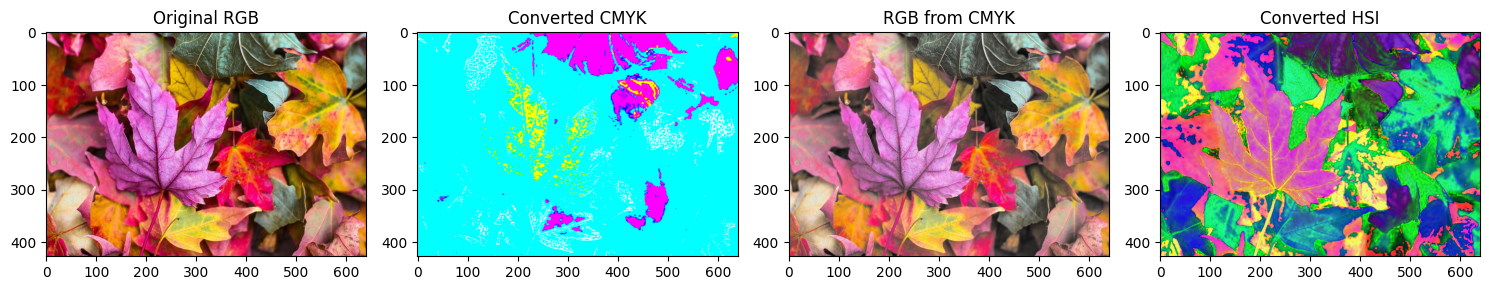

In [46]:
r, g, b = q1_image1[:,:,0], q1_image1[:, :, 1], q1_image1[:, :, 2]
rgb =np.dstack((r, g, b)) / 255
# Convert RGB to CMYK
c, m, y, k = RGB_to_CMYK(r, g, b)
cmyk = np.dstack((c, m, y, k))

# Convert CMYK back to RGB
r2, g2, b2 = CMYK_to_RGB(c, m, y, k)
rgbFromCmyk = np.dstack((r2, g2, b2)) / 255
# Convert RGB to HSI
h, s, i = RGB_to_HSI(r, g, b)
hsi = np.dstack((h/360, s, i))
# Create an image to display the results
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

# Plot original RGB color
axs[0].set_title('Original RGB')
axs[0].imshow(rgb, aspect='auto')

# Plot converted CMYK color
axs[1].set_title('Converted CMYK')
axs[1].imshow(cmyk, aspect='auto')

# Plot converted RGB color from CMYK
axs[2].set_title('RGB from CMYK')
axs[2].imshow(rgbFromCmyk, aspect='auto')

# Plot converted HSI color
axs[3].set_title('Converted HSI')
axs[3].imshow(hsi, aspect='auto')

plt.tight_layout()
plt.show()


# Q2

## Read images

In [77]:
image2 = cv.imread(os.path.join('images/', '2.jpg'))
image2 = cv.cvtColor(image2,cv.COLOR_BGR2RGB)

image3 = cv.imread(os.path.join('images/', '3.jpg'))
image3 = cv.cvtColor(image3,cv.COLOR_BGR2RGB)

In [81]:
# image2.shape,image3.shape

((899, 917, 3), (906, 917, 3))

## Find differences between two pictures

In [88]:
def diff (image1, image2):

  #############
  ## first gray scale images
  image1_check = cv.cvtColor(image1.copy(),cv.COLOR_RGB2GRAY)
  image2_check = cv.cvtColor(image2.copy(),cv.COLOR_RGB2GRAY)

  ## in the above cell i show that the shape of those two pictures are not the same
  ## since the shapes are not the same we should show the difference between those two pictures using intersection and it means the minimum between those two pics

  # difference_image_shape = (min(image1_check.shape[0], image2_check.shape[0]) , min(image1_check.shape[1], image2_check.shape[1]) , 3)
  difference_image_shape = (899,917,3)
  result = np.zeros(difference_image_shape, np.uint8)
  result[:,:,0],result[:,:,1],result[:,:,2] = image1_check[:899, :917],image1_check[:899, :917],image2_check[:899, :917]
  #############

  return result

## Show result

(-0.5, 916.5, 898.5, -0.5)

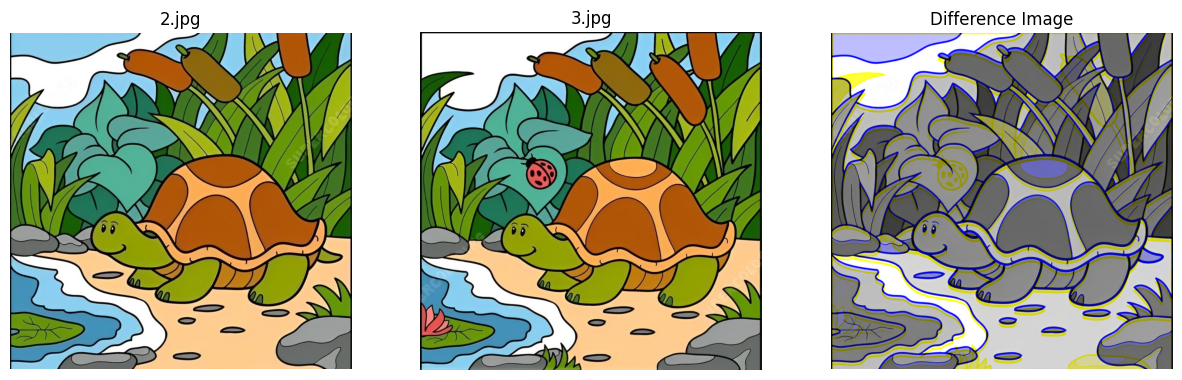

In [89]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image2)
axs[0].set_title('2.jpg')
axs[0].axis('off')

axs[1].imshow(image3)
axs[1].set_title('3.jpg')
axs[1].axis('off')

axs[2].imshow(diff(image2, image3))
axs[2].set_title('Difference Image')
axs[2].axis('off')